In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/Entry/Employee.csv")

In [4]:
# List down the unique values and their lengths for each feature
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique Values in '{column}': {unique_values}")
    print(f"Number of Unique Value in '{column}': {len(unique_values)}\n")

Unique Values in 'Company': ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Value in 'Company': 7

Unique Values in 'Age': [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Value in 'Age': 30

Unique Values in 'Salary': [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Value in 'Salary': 41

Unique Values in 'Place': ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Value in 'Place': 12

Unique Values in 'Country': ['India']
Number of Unique Value in 'Country': 1

Unique Values in 'Gender': [0 1]
Number of Unique Value in 'Gender': 2



In [6]:
# Perform statistical analysis for numerical columns
statistical_analysis = df.describe()
print(statistical_analysis)

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [8]:
# Find missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [11]:
# Find inappropriate values (e.g., 0 in 'age' column)
inappropriate_values = df[df['Age'] == 0]
print(f"Inappropriate Values in 'age' column:\n {inappropriate_values}")

Inappropriate Values in 'age' column:
      Company  Age  Salary       Place Country  Gender
88   Infosys  0.0  3030.0    Calcutta   India       0
92       TCS  0.0  3045.0       Delhi   India       0
101      CTS  0.0  2034.0  Podicherry   India       0
107      TCS  0.0  9024.0     Chennai   India       1
111  Infosys  0.0  3234.0      Mumbai   India       0
121      CTS  0.0  1234.0    Calcutta   India       0


In [13]:
# Replace 0 with NaN in the 'age' column
df['Age'].replace(0, np.nan, inplace = True)

In [15]:
# Treat missing values using mean, median, or mode
# For numerical columns (replace with mean or median)
df['Age'].fillna(df['Age'].mean(), inplace = True) # Replace missing 'age' with mean

In [16]:
# For categorical columns (replace with mode)

In [18]:
df['Place'].fillna(df['Place'].mode()[0], inplace = True)# Replace missing 'Place' with mode

C:\Users\HABEEB\AppData\Local\Temp\ipykernel_13716\519565009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Place'].fillna(df['Place'].mode()[0], inplace = True)# Replace missing 'Place' with mode


In [19]:
# Remove duplicate rows
df.drop_duplicates(inplace = True)
print("Number of Rows after removing duplicates:", len(df))

Number of Rows after removing duplicates: 144


In [21]:
# Finding Outliers using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Number of rows after removing outliers: 121


In [3]:
# Filtering the data based on the conditions
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

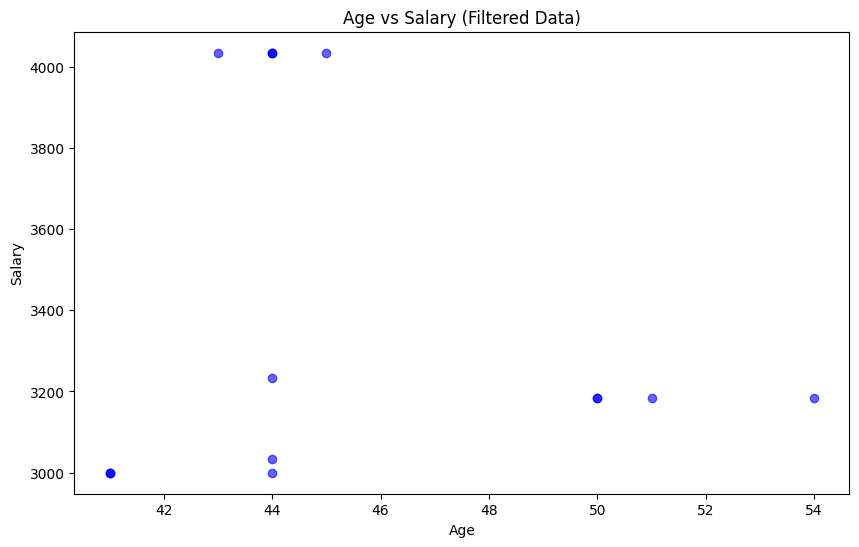

In [6]:
# Scatter plot for age vs salary
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Age'], filtered_data['Salary'], color='blue', alpha=0.6)
plt.title('Age vs Salary (Filtered Data)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [7]:
# Counting occurrences of each place
place_counts = df['Place'].value_counts()

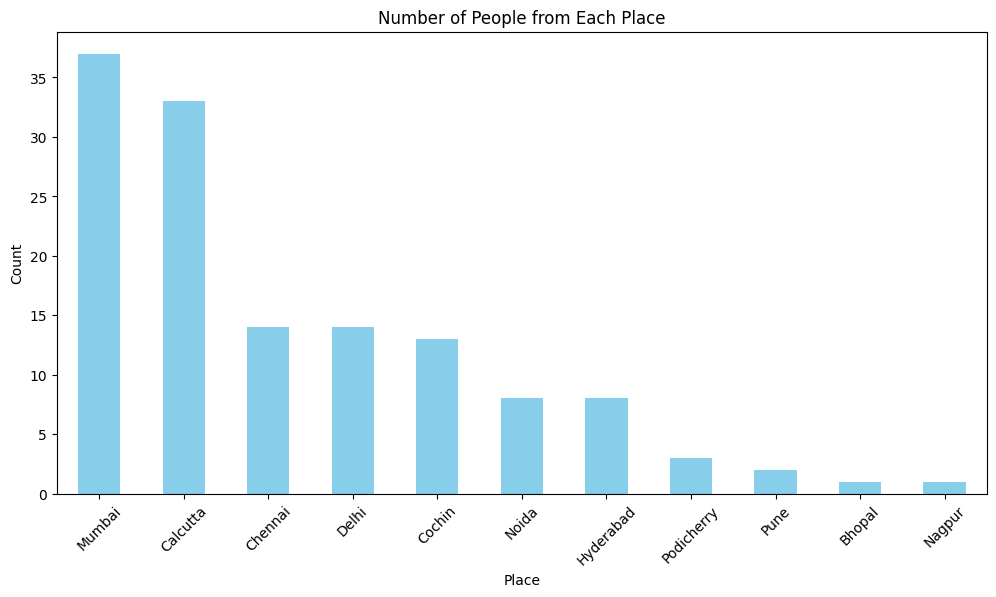

In [8]:
plt.figure(figsize = (12, 6))
place_counts.plot(kind = 'bar', color = 'skyblue')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.0 MB 1.4 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.0 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.0 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.0 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.0 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.0 MB 1.5 MB/s eta 0:00:06
   ------------ --------------------------- 3.4/11.0 MB 1.6 MB/s eta 0:00:05
   -------------- ------------------------- 3.9/11.0 MB 1.7 MB/s eta 0:00:05
   --------------- -

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [19]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include = ['object']).columns

In [20]:
# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col + '_label_encoded'] = label_encoder.fit_transform(df[col])

In [21]:
df_one_hot_encoded = pd.get_dummies(df, columns = categorical_columns, prefix = categorical_columns, drop_first = True)

In [22]:
df.head()

,Company,Age,Salary,Place,Country,Gender,Company_label_encoded,Place_label_encoded,Country_label_encoded
0,TCS,20.0,NaN,Chennai,India,0,4,2,0
1,Infosys,30.0,NaN,Mumbai,India,0,2,6,0
2,TCS,35.0,2300.0,Calcutta,India,0,4,1,0
3,Infosys,40.0,3000.0,Delhi,India,0,2,4,0
4,TCS,23.0,4000.0,Mumbai,India,0,4,6,0


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [25]:
# Select features for scaling (excluding any encoded categorical columns or target columns if applicable)
# Assuming 'df' is your DataFrame, and you want to scale all columns after encoding
scaled_columns = df.select_dtypes(include = ['float64', 'int64']).columns


In [26]:
# Apply StandardScaler
df_standard_scaled = df.copy() # Creating a copy to keep original data intact
df_standard_scaled[scaled_columns] = standard_scaler.fit_transform(df[scaled_columns])

In [27]:
# Apply MinMaxScaler# Now df_standard_scaled and df_minmax_scaled contain the scaled versions of the original DataFrame
df_minmax_scaled = df.copy()  # Creating another copy to apply MinMax scaling
df_minmax_scaled[scaled_columns] = minmax_scaler.fit_transform(df[scaled_columns])
# Now df_standard_scaled and df_minmax_scaled contain the scaled versions of the original DataFrame